In [4]:
import hddm
import kabuki
import numpy as np
import pandas as pd
from glob import glob
from kabuki.analyze import gelman_rubin
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler

In [5]:
model_result = pd.DataFrame({'model':[],
                                'rhat>=1.1':[],
                                'dic':[]})

# file name of each model
modname = np.array(['m0',
                    'm1',
                    'm3',
                    'm4_x',
                    'm5_x',
                    'm6',
                    'm7',
                    'm8',
                    'm6_z',
                    'm7_z',
                    'm8_z',
                    
                    'm6_sub',
                    'm7_sub',
                    'm8_sub',
                    'm6_z_sub',
                    'm7_z_sub',
                    'm8_z_sub'])
modregime = np.array(['basic model',
                    'basic model including z',
                    'regressor model with v',
                    'regressor model with v,z',

                    'regressor model with v,t',
                    
                    'regressor model with v slope,t, trial -level',
                    'regressor model with v amplitude,t, trial -level',
                    'regressor model with v peak,t, trial -level',

                    'regressor model with v slope,z, trial -level',
                    'regressor model with v amplitude,z, trial -level',
                    'regressor model with v peak,z, trial -level',
                    
                    'regressor model with v slope,t, subject -level',
                    'regressor model with v amplitude,t, subject -level',
                    'regressor model with v peak,t, subject -level',
                    
                    'regressor model with v slope,z, subject -level',
                    'regressor model with v amplitude,z, subject -level',
                    'regressor model with v peak,z, subject -level',])

for i, name in enumerate(modname):
    models = []
    for model_path in glob(os.path.join(os.getcwd(),'2_4_2_2_temp',name+'_chain_*')):
        if ('db' not in model_path) and ('csv' not in model_path):


            modelx = hddm.load(model_path)
            models.append(modelx)
    
    regime = modregime[i]

    rhat = gelman_rubin(models)

    rhat_number = np.sum(np.array(list(rhat.values()))>=1.1)

    m = kabuki.utils.concat_models(models)

    dic = m.dic


    m_result  = pd.DataFrame({'model':[regime],
                                'rhat>=1.1':[rhat_number],
                                'dic':[dic],})
    model_result = pd.concat([model_result,m_result])

In [7]:
modname = np.array([
                    'm6_z',
                   # 'm7_z',
                   # 'm8_z',
                    
                    'm6_z_sub',
                    #'m7_z_sub',
                    #'m8_z_sub'
                     ])
betas=[]
for i, name in enumerate(modname):
    models = []
    for model_path in glob(os.path.join(os.getcwd(),'2_4_2_2_temp',name+'_chain_*')):
        if ('db' not in model_path) and ('csv' not in model_path):


            modelx = hddm.load(model_path)
            models.append(modelx)
    m = kabuki.utils.concat_models(models)
    beta = np.mean(m.get_traces().filter(regex = "v_cpp.*"),axis=0)[0]
    print(m.gen_stats()[['mean','2.5q','97.5q']].loc[["v_cpp_slope"],:])
    betas.append(beta)


KeyError: "None of [Index(['v_cpp_slope'], dtype='object')] are in the [index]"

In [10]:
modname = np.array([
                    'm6',
                   # 'm7_z',
                   # 'm8_z',
                    
                    'm6_sub',
                    #'m7_z_sub',
                    #'m8_z_sub'
                     ])
betas=[]
for i, name in enumerate(modname):
    models = []
    for model_path in glob(os.path.join(os.getcwd(),'2_4_2_2_temp',name+'_chain_*')):
        if ('db' not in model_path) and ('csv' not in model_path):


            modelx = hddm.load(model_path)
            models.append(modelx)
    m = kabuki.utils.concat_models(models)
    beta = np.mean(m.get_traces().filter(regex = "v_cpp.*"),axis=0)[0]
    print(m.gen_stats()[['mean','2.5q','97.5q']].loc[["v_cpp_slope"],:])
    betas.append(beta)

                 mean      2.5q     97.5q
v_cpp_slope -0.011713 -0.124096  0.109944
                 mean      2.5q     97.5q
v_cpp_slope -0.038726 -0.233401  0.163603


In [9]:
modname = np.array([
                    #'m6_z',
                   # 'm7_z',
                    'm8_z',
                    
                    #'m6_z_sub',
                    #'m7_z_sub',
                    'm8_z_sub'
                     ])
betas=[]
for i, name in enumerate(modname):
    models = []
    for model_path in glob(os.path.join(os.getcwd(),'2_4_2_2_temp',name+'_chain_*')):
        if ('db' not in model_path) and ('csv' not in model_path):


            modelx = hddm.load(model_path)
            models.append(modelx)
    m = kabuki.utils.concat_models(models)
    beta = np.mean(m.get_traces().filter(regex = "v_cpp.*"),axis=0)[0]
    print(m.gen_stats()[['mean','2.5q','97.5q']].loc[["v_cpp_peak"],:])
    betas.append(beta)


               mean      2.5q     97.5q
v_cpp_peak  0.01996 -0.099398  0.147085
                mean      2.5q    97.5q
v_cpp_peak -0.016554 -0.206545  0.16964


In [11]:
modname = np.array([
                    #'m6_z',
                   'm7_z',
                    #'m8_z',
                    
                    #'m6_z_sub',
                    'm7_z_sub',
                    #'m8_z_sub'
                     ])
betas=[]
for i, name in enumerate(modname):
    models = []
    for model_path in glob(os.path.join(os.getcwd(),'2_4_2_2_temp',name+'_chain_*')):
        if ('db' not in model_path) and ('csv' not in model_path):


            modelx = hddm.load(model_path)
            models.append(modelx)
    m = kabuki.utils.concat_models(models)
    beta = np.mean(m.get_traces().filter(regex = "v_cpp.*"),axis=0)[0]
    print(m.gen_stats()[['mean','2.5q','97.5q']].loc[["v_cpp_amplitude"],:])
    betas.append(beta)

                     mean      2.5q    97.5q
v_cpp_amplitude -0.042808 -0.149269  0.06947
                    mean      2.5q     97.5q
v_cpp_amplitude -0.03406 -0.232431  0.190808


In [6]:
modname = np.array([
                   # 'm6_z',
                    'm7_z',
                   # 'm8_z',
                    
                    #'m6_z_sub',
                    'm7_z_sub',
                    #'m8_z_sub'
                     ])
betas=[]
for i, name in enumerate(modname):
    models = []
    for model_path in glob(os.path.join(os.getcwd(),'2_4_2_2_temp',name+'_chain_*')):
        if ('db' not in model_path) and ('csv' not in model_path):


            modelx = hddm.load(model_path)
            models.append(modelx)
    m = kabuki.utils.concat_models(models)
    beta = np.mean(m.get_traces().filter(regex = "v_cpp.*"),axis=0)[0]
    print(m.gen_stats()[['mean','2.5q','97.5q']].loc[["v_cpp_amplitude"],:])
    betas.append(beta)

                     mean      2.5q    97.5q
v_cpp_amplitude -0.042808 -0.149269  0.06947
                    mean      2.5q     97.5q
v_cpp_amplitude -0.03406 -0.232431  0.190808


In [13]:
modname = np.array([
                    #'m6_z',
                   #'m7_z',
                    'm8',
                    
                    #'m6_z_sub',
                    #'m7_z_sub',
                    'm8_sub'
                     ])
betas=[]
for i, name in enumerate(modname):
    models = []
    for model_path in glob(os.path.join(os.getcwd(),'2_4_2_2_temp',name+'_chain_*')):
        if ('db' not in model_path) and ('csv' not in model_path):


            modelx = hddm.load(model_path)
            models.append(modelx)
    m = kabuki.utils.concat_models(models)
    beta = np.mean(m.get_traces().filter(regex = "v_cpp.*"),axis=0)[0]
    print(m.gen_stats()[['mean','2.5q','97.5q']].loc[["v_cpp_peak"],:])
    betas.append(beta)

                mean     2.5q     97.5q
v_cpp_peak  0.022168 -0.09669  0.148767
                mean     2.5q    97.5q
v_cpp_peak -0.018497 -0.21756  0.18073


In [28]:
betas

[-0.009328248467264938,
 -0.042807826800222985,
 0.019960024923397792,
 -0.0690612776799044,
 -0.0340604461784932,
 -0.01655431855819909]

In [26]:
np.mean(m.get_traces().filter(regex = "v_cpp.*"),axis=0)

v_cpp_peak                                                  -0.016554
v_cpp_peak_std                                               0.090750
v_cpp_peak_subj.1                                           -0.017484
v_cpp_peak_subj.3                                           -0.019718
v_cpp_peak_subj.5                                           -0.007251
v_cpp_peak_subj.6                                           -0.013148
v_cpp_peak_subj.7                                           -0.012588
v_cpp_peak_subj.8                                           -0.014371
v_cpp_peak_subj.9                                           -0.019190
v_cpp_peak_subj.10                                          -0.027238
v_cpp_peak_subj.11                                          -0.013436
v_cpp_peak_subj.12                                          -0.044365
v_cpp_peak_subj.13                                          -0.000691
v_cpp_peak_subj.14                                          -0.012520
v_cpp_peak_subj.15  

In [6]:
model_result

,model,rhat>=1.1,dic
0,basic model,0.0,1817.309710
0,basic model including z,0.0,1803.365545
0,regressor model with v,0.0,1806.240887
0,"regressor model with v,z",0.0,1806.103762
0,"regressor model with v,t",0.0,1665.976958
0,"regressor model with v slope,t, trial -level",0.0,1650.511655
0,"regressor model with v amplitude,t, trial -level",0.0,1664.278569
0,"regressor model with v peak,t, trial -level",0.0,1634.060611
0,"regressor model with v slope,z, trial -level",16.0,-18948.424294
0,"regressor model with v amplitude,z, trial -level",16.0,-19034.996448


In [10]:
models_4 = []
for model_path in glob(os.path.join(os.getcwd(),'2_4_2_2_temp/m4_chain_*')):
    if ('db' not in model_path) and ('csv' not in model_path):
        modelx = hddm.load(model_path)
        models_4.append(modelx)
        
print(gelman_rubin(models_4))

m4 = kabuki.utils.concat_models(models_4)

{'a': 1.000101310503374, 'a_std': 1.0000151584584418, 'a_subj.1': 0.999971262457605, 'a_subj.3': 0.9999304312172955, 'a_subj.5': 1.0011686384423004, 'a_subj.6': 0.9999332091593359, 'a_subj.7': 0.9999155363925682, 'a_subj.8': 1.0000349715045396, 'a_subj.9': 1.0016122573862654, 'a_subj.10': 1.0014887204816036, 'a_subj.11': 1.0002598800885374, 'a_subj.12': 1.000091523296123, 'a_subj.13': 1.0000528278250895, 'a_subj.14': 0.9998719988507063, 'a_subj.15': 1.0001678144044812, 'a_subj.16': 0.9999453336682148, 'a_subj.17': 0.9998819725797307, 't': 1.0000480237444989, 't_std': 1.0001287551703697, 't_subj.1': 0.9999640175745487, 't_subj.3': 1.0000642721580282, 't_subj.5': 1.0014605476397533, 't_subj.6': 1.0000108065189857, 't_subj.7': 0.9998999672710092, 't_subj.8': 1.0003609434156309, 't_subj.9': 1.0034098735263992, 't_subj.10': 1.002016466788766, 't_subj.11': 1.0003634116476048, 't_subj.12': 1.0000154910102506, 't_subj.13': 1.0000006688534555, 't_subj.14': 1.0000535710551202, 't_subj.15': 1.000

In [11]:

print(gelman_rubin(models_4))

m4 = kabuki.utils.concat_models(models_4)

print(m4.dic)


  
  

{'a': 1.000101310503374, 'a_std': 1.0000151584584418, 'a_subj.1': 0.999971262457605, 'a_subj.3': 0.9999304312172955, 'a_subj.5': 1.0011686384423004, 'a_subj.6': 0.9999332091593359, 'a_subj.7': 0.9999155363925682, 'a_subj.8': 1.0000349715045396, 'a_subj.9': 1.0016122573862654, 'a_subj.10': 1.0014887204816036, 'a_subj.11': 1.0002598800885374, 'a_subj.12': 1.000091523296123, 'a_subj.13': 1.0000528278250895, 'a_subj.14': 0.9998719988507063, 'a_subj.15': 1.0001678144044812, 'a_subj.16': 0.9999453336682148, 'a_subj.17': 0.9998819725797307, 't': 1.0000480237444989, 't_std': 1.0001287551703697, 't_subj.1': 0.9999640175745487, 't_subj.3': 1.0000642721580282, 't_subj.5': 1.0014605476397533, 't_subj.6': 1.0000108065189857, 't_subj.7': 0.9998999672710092, 't_subj.8': 1.0003609434156309, 't_subj.9': 1.0034098735263992, 't_subj.10': 1.002016466788766, 't_subj.11': 1.0003634116476048, 't_subj.12': 1.0000154910102506, 't_subj.13': 1.0000006688534555, 't_subj.14': 1.0000535710551202, 't_subj.15': 1.000

In [12]:
model = m4.get_traces()

In [13]:

v = pd.DataFrame({"v":np.mean(model.filter(regex = "v_C.*"),axis=0)})
v_m4 = v.iloc[2:,:].to_numpy()

In [18]:
v.iloc[2:,:]

,v
"v_C(coherency, Treatment('low'))[T.high]_subj.1",-0.017554
"v_C(coherency, Treatment('low'))[T.high]_subj.3",-0.017941
"v_C(coherency, Treatment('low'))[T.high]_subj.5",0.005858
"v_C(coherency, Treatment('low'))[T.high]_subj.6",-0.012874
"v_C(coherency, Treatment('low'))[T.high]_subj.7",-0.013427
"v_C(coherency, Treatment('low'))[T.high]_subj.8",-0.023750
"v_C(coherency, Treatment('low'))[T.high]_subj.9",-0.006195
"v_C(coherency, Treatment('low'))[T.high]_subj.10",0.003128
"v_C(coherency, Treatment('low'))[T.high]_subj.11",-0.003658
"v_C(coherency, Treatment('low'))[T.high]_subj.12",-0.011217


In [14]:
data = pd.read_csv('data.csv')
data

,rt,response,subj_idx,attention,coherency,prioritization,stimulus,run,_response,id,cpp_peak,cpp_slope,cpp_amplitude,index
0,0.233677,1.0,17,double,high,no,face,1,0.0,0,-8.079517e-07,-0.000004,2.028027e-06,0.0
1,0.351817,1.0,16,right,high,yes,face,1,0.0,0,-2.689282e-07,-0.000004,2.684621e-06,0.0
2,0.387365,1.0,15,double,high,no,face,1,0.0,0,2.485908e-06,0.000019,3.384187e-06,0.0
3,0.866449,1.0,14,left,high,yes,car,1,1.0,0,3.637858e-06,-0.000061,-3.439111e-06,0.0
4,0.389671,1.0,13,double,high,no,face,1,0.0,0,4.947688e-06,-0.000034,5.700386e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,0.301089,1.0,7,left,high,yes,car,2,1.0,143,4.736038e-06,-0.000008,2.267714e-06,287.0
3657,1.368623,1.0,6,double,low,no,face,2,0.0,143,-7.884860e-07,-0.000008,-2.597419e-06,287.0
3658,0.271034,1.0,5,left,low,yes,car,2,1.0,143,7.526509e-06,-0.000039,1.188412e-06,287.0
3659,0.715909,1.0,3,double,low,no,car,2,1.0,143,4.439253e-06,-0.000018,6.979216e-07,287.0


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                    0.3721
Date:                Fri, 11 Nov 2022   Prob (F-statistic):              0.552
Time:                        10:39:57   Log-Likelihood:                -21.072
No. Observations:                  15   AIC:                             46.14
Df Residuals:                      13   BIC:                             47.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.327e-17      0.273  -3.04e-16      1.0

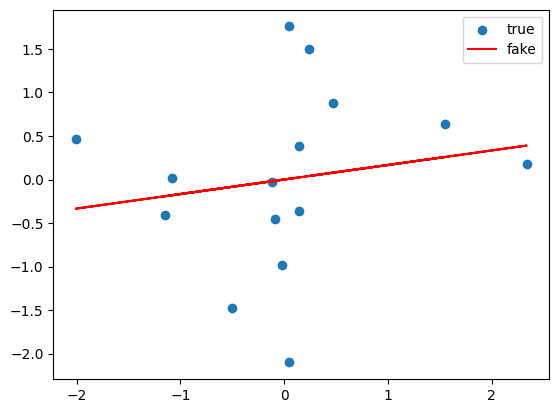

In [15]:
cpp_slope =pd.DataFrame(data.groupby(['subj_idx','coherency']).cpp_slope.mean().unstack())
cpp_slope_ = cpp_slope[['high']].to_numpy()-cpp_slope[['low']].to_numpy()
stdsc=StandardScaler()
y = v_m4
y = stdsc.fit_transform(y)


x1 = cpp_slope_ 
x1 = stdsc.fit_transform(x1)
x1 = sm.add_constant(x1)
model1 = sm.OLS(y,x1).fit()
print(model1.summary())

predict1 = model1.predict()
plt.scatter(stdsc.fit_transform(cpp_slope_ ) ,stdsc.fit_transform(y),label='true')
plt.plot(stdsc.fit_transform(cpp_slope_ ),predict1,label='fake',color='red')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                  0.002774
Date:                Tue, 18 Oct 2022   Prob (F-statistic):              0.959
Time:                        21:27:46   Log-Likelihood:                -21.282
No. Observations:                  15   AIC:                             46.56
Df Residuals:                      13   BIC:                             47.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.327e-17      0.277     -3e-16      1.0

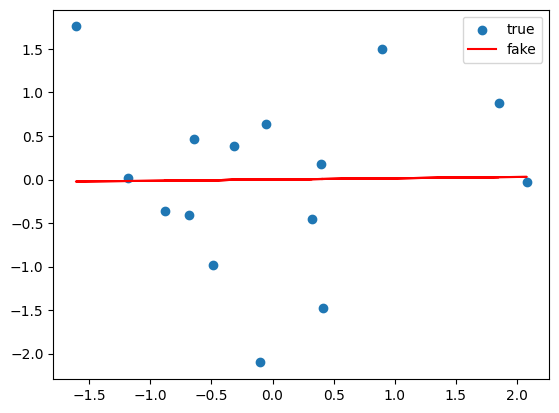

In [ ]:
cpp_amplitude =pd.DataFrame(data.groupby(['subj_idx','coherency']).cpp_amplitude.mean().unstack())
cpp_amplitude_ = cpp_amplitude[['high']].to_numpy()-cpp_amplitude[['low']].to_numpy()
stdsc=StandardScaler()
y = v_m4
y = stdsc.fit_transform(y)


x1 = cpp_amplitude_ 
x1 = stdsc.fit_transform(x1)
x1 = sm.add_constant(x1)
model1 = sm.OLS(y,x1).fit()
print(model1.summary())

predict1 = model1.predict()
plt.scatter(stdsc.fit_transform(cpp_amplitude_ ) ,stdsc.fit_transform(y),label='true')
plt.plot(stdsc.fit_transform(cpp_amplitude_ ),predict1,label='fake',color='red')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.2615
Date:                Tue, 18 Oct 2022   Prob (F-statistic):              0.618
Time:                        21:28:39   Log-Likelihood:                -21.135
No. Observations:                  15   AIC:                             46.27
Df Residuals:                      13   BIC:                             47.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.327e-17      0.275  -3.03e-16      1.0

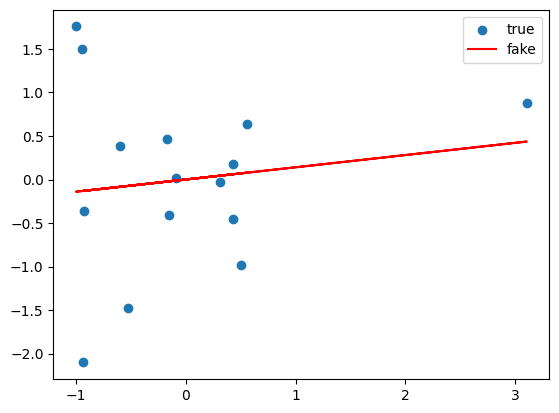

In [ ]:
cpp_peak =pd.DataFrame(data.groupby(['subj_idx','coherency']).cpp_peak.mean().unstack())
cpp_peak_ = cpp_peak[['high']].to_numpy()-cpp_peak[['low']].to_numpy()
stdsc=StandardScaler()
y = v_m4
y = stdsc.fit_transform(y)


x1 = cpp_peak_ 
x1 = stdsc.fit_transform(x1)
x1 = sm.add_constant(x1)
model1 = sm.OLS(y,x1).fit()
print(model1.summary())

predict1 = model1.predict()
plt.scatter(stdsc.fit_transform(cpp_peak_ ) ,stdsc.fit_transform(y),label='true')
plt.plot(stdsc.fit_transform(cpp_peak_ ),predict1,label='fake',color='red')
plt.legend()
plt.show() 

In [3]:
models_5 = []
for model_path in glob(os.path.join(os.getcwd(),'2_4_2_2_temp/m5_chain_*')):
    if ('db' not in model_path) and ('csv' not in model_path):
        modelx = hddm.load(model_path)
        models_5.append(modelx)
        
print(gelman_rubin(models_5))


{'a': 0.999704097340044, 'a_std': 1.0013657749511702, 'a_subj.1': 1.0020516736189622, 'a_subj.3': 1.000434886033405, 'a_subj.5': 1.0078147947899, 'a_subj.6': 1.0003805499756946, 'a_subj.7': 1.0002690299024892, 'a_subj.8': 1.0013178720523277, 'a_subj.9': 1.0027399909842105, 'a_subj.10': 1.0007089734210046, 'a_subj.11': 1.0006321260381714, 'a_subj.12': 0.9999447561209204, 'a_subj.13': 0.9998002562445468, 'a_subj.14': 1.0008635334526328, 'a_subj.15': 0.9996389015077943, 'a_subj.16': 1.0002767164841333, 'a_subj.17': 1.0000604769898975, 't': 0.9998147126575856, 't_std': 0.9999661848816327, 't_subj.1': 1.0099326855187563, 't_subj.3': 1.0005317876611444, 't_subj.5': 1.0086241849215378, 't_subj.6': 1.0001430656401633, 't_subj.7': 1.0000042311390787, 't_subj.8': 1.001477931729425, 't_subj.9': 1.0089868601964211, 't_subj.10': 1.0008424325343275, 't_subj.11': 1.0006477300079217, 't_subj.12': 0.9999697148291041, 't_subj.13': 1.0005966931505326, 't_subj.14': 0.9999674015428123, 't_subj.15': 0.99990

In [4]:

m5 = kabuki.utils.concat_models(models_5)

In [5]:
model = m5.get_traces()

In [6]:
v = pd.DataFrame({"v":np.mean(model.filter(regex = "v_C.*"),axis=0)})
v_m5 = v.iloc[2:,:].to_numpy()

In [7]:
data = pd.read_csv('data.csv')
data

,rt,response,subj_idx,attention,coherency,prioritization,stimulus,run,_response,id,cpp_peak,cpp_slope,cpp_amplitude,index
0,0.233677,1.0,17,double,high,no,face,1,0.0,0,-8.079517e-07,-0.000004,2.028027e-06,0.0
1,0.351817,1.0,16,right,high,yes,face,1,0.0,0,-2.689282e-07,-0.000004,2.684621e-06,0.0
2,0.387365,1.0,15,double,high,no,face,1,0.0,0,2.485908e-06,0.000019,3.384187e-06,0.0
3,0.866449,1.0,14,left,high,yes,car,1,1.0,0,3.637858e-06,-0.000061,-3.439111e-06,0.0
4,0.389671,1.0,13,double,high,no,face,1,0.0,0,4.947688e-06,-0.000034,5.700386e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,0.301089,1.0,7,left,high,yes,car,2,1.0,143,4.736038e-06,-0.000008,2.267714e-06,287.0
3657,1.368623,1.0,6,double,low,no,face,2,0.0,143,-7.884860e-07,-0.000008,-2.597419e-06,287.0
3658,0.271034,1.0,5,left,low,yes,car,2,1.0,143,7.526509e-06,-0.000039,1.188412e-06,287.0
3659,0.715909,1.0,3,double,low,no,car,2,1.0,143,4.439253e-06,-0.000018,6.979216e-07,287.0


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.7332
Date:                Sat, 26 Nov 2022   Prob (F-statistic):              0.407
Time:                        02:36:23   Log-Likelihood:                -20.873
No. Observations:                  15   AIC:                             45.75
Df Residuals:                      13   BIC:                             47.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.665e-16      0.270   6.17e-16      1.0

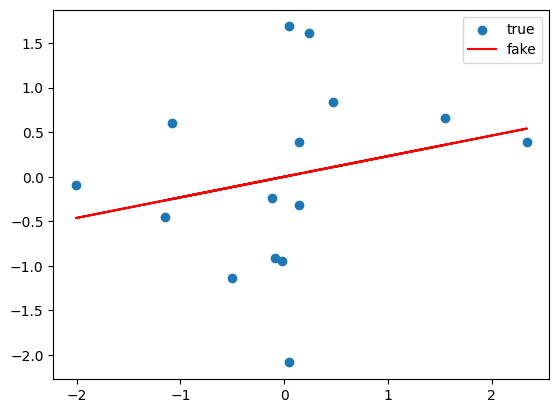

In [8]:
cpp_slope =pd.DataFrame(data.groupby(['subj_idx','coherency']).cpp_slope.mean().unstack())
cpp_slope_ = cpp_slope[['high']].to_numpy()-cpp_slope[['low']].to_numpy()
stdsc=StandardScaler()
y = v_m5
y = stdsc.fit_transform(y)


x1 = cpp_slope_ 
x1 = stdsc.fit_transform(x1)
x1 = sm.add_constant(x1)
model1 = sm.OLS(y,x1).fit()
print(model1.summary())

predict1 = model1.predict()
plt.scatter(stdsc.fit_transform(cpp_slope_ ) ,stdsc.fit_transform(y),label='true')
plt.plot(stdsc.fit_transform(cpp_slope_ ),predict1,label='fake',color='red')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.076
Method:                 Least Squares   F-statistic:                  0.008543
Date:                Sat, 26 Nov 2022   Prob (F-statistic):              0.928
Time:                        02:45:31   Log-Likelihood:                -21.279
No. Observations:                  15   AIC:                             46.56
Df Residuals:                      13   BIC:                             47.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.665e-16      0.277   6.01e-16      1.0

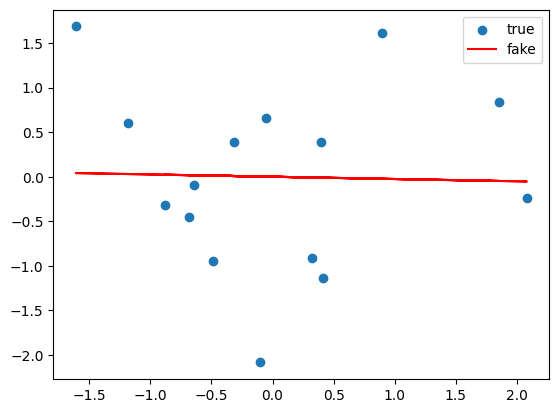

In [18]:
cpp_amplitude =pd.DataFrame(data.groupby(['subj_idx','coherency']).cpp_amplitude.mean().unstack())
cpp_amplitude_ = cpp_amplitude[['high']].to_numpy()-cpp_amplitude[['low']].to_numpy()
stdsc=StandardScaler()
y = v_m5
y = stdsc.fit_transform(y)


x1 = cpp_amplitude_ 
x1 = stdsc.fit_transform(x1)
x1 = sm.add_constant(x1)
model1 = sm.OLS(y,x1).fit()
print(model1.summary())

predict1 = model1.predict()
plt.scatter(stdsc.fit_transform(cpp_amplitude_ ) ,stdsc.fit_transform(y),label='true')
plt.plot(stdsc.fit_transform(cpp_amplitude_ ),predict1,label='fake',color='red')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.1537
Date:                Sat, 26 Nov 2022   Prob (F-statistic):              0.701
Time:                        02:45:08   Log-Likelihood:                -21.196
No. Observations:                  15   AIC:                             46.39
Df Residuals:                      13   BIC:                             47.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.665e-16      0.276   6.04e-16      1.0

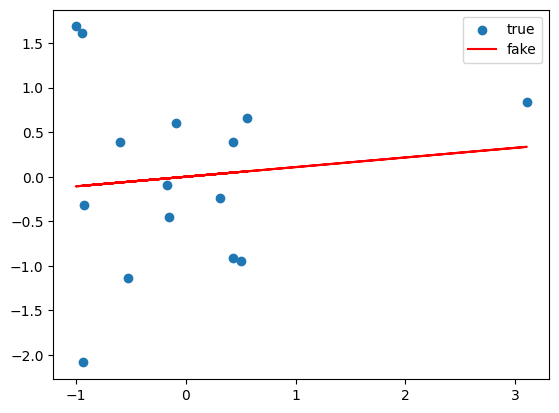

In [17]:
cpp_peak =pd.DataFrame(data.groupby(['subj_idx','coherency']).cpp_peak.mean().unstack())
cpp_peak_ = cpp_peak[['high']].to_numpy()-cpp_peak[['low']].to_numpy()
stdsc=StandardScaler()
y = v_m5
y = stdsc.fit_transform(y)


x1 = cpp_peak_ 
x1 = stdsc.fit_transform(x1)
x1 = sm.add_constant(x1)
model1 = sm.OLS(y,x1).fit()
print(model1.summary())

predict1 = model1.predict()
plt.scatter(stdsc.fit_transform(cpp_peak_ ) ,stdsc.fit_transform(y),label='true')
plt.plot(stdsc.fit_transform(cpp_peak_ ),predict1,label='fake',color='red')
plt.legend()
plt.show() 

In [9]:
model_result = pd.DataFrame({'model':[],
                                'rhat>=1.1':[],
                                'dic':[]})

# file name of each model
modname = np.array(['m0',
                    'm1',
                    'm3',
                    'm4',
                    'm5',
                    'm6',
                    'm7',
                    'm8',
                    'm6_z',
                    'm7_z',
                    'm8_z',
                    
                    'm6_sub',
                    'm7_sub',
                    'm8_sub',
                    'm6_z_sub',
                    'm7_z_sub',
                    'm8_z_sub'])
modregime = np.array(['basic model',
                    'basic model including z',
                    'regressor model with v',
                    'regressor model with v,z',
                    'regressor model with v,t',
                    
                    'regressor model with v slope,t, trial -level',
                    'regressor model with v amplitude,t, trial -level',
                    'regressor model with v peak,t, trial -level',

                    'regressor model with v slope,z, trial -level',
                    'regressor model with v amplitude,z, trial -level',
                    'regressor model with v peak,z, trial -level',
                    
                    'regressor model with v slope,t, subject -level',
                    'regressor model with v amplitude,t, subject -level',
                    'regressor model with v peak,t, subject -level',
                    
                    'regressor model with v slope,z, subject -level',
                    'regressor model with v amplitude,z, subject -level',
                    'regressor model with v peak,z, subject -level',])

for i, name in enumerate(modname):
    models = []
    for model_path in glob(os.path.join(os.getcwd(),'2_4_2_2_temp',name+'_chain_*')):
        if ('db' not in model_path) and ('csv' not in model_path):


            modelx = hddm.load(model_path)
            models.append(modelx)
    
    regime = modregime[i]

    rhat = gelman_rubin(models)

    rhat_number = np.sum(np.array(list(rhat.values()))>=1.1)

    m = kabuki.utils.concat_models(models)

    dic = m.dic

    beta = np.mean(m.get_traces().filter(regex = "v_cpp.*"),axis=0)[0]

    m_result  = pd.DataFrame({'model':[regime],
                                'rhat>=1.1':[rhat_number],
                                'dic':[dic],
                                'beta':[beta]})
    model_result = pd.concat([model_result,m_result])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [16]:
modname = np.array([
                    'm6',
                    'm7',
                    'm8',
                    
                    'm6_sub',
                    'm7_sub',
                    'm8_sub'])
betas=[]
for i, name in enumerate(modname):
    models = []
    for model_path in glob(os.path.join(os.getcwd(),'2_4_2_2_temp',name+'_chain_*')):
        if ('db' not in model_path) and ('csv' not in model_path):


            modelx = hddm.load(model_path)
            models.append(modelx)
    m = kabuki.utils.concat_models(models)
    beta = np.mean(m.get_traces().filter(regex = "v_cpp:.*"),axis=0)[0]
    betas.append(beta)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
betas

[-0.011712873907548571,
 -0.037430413674300285,
 0.022168163458720413,
 -0.03872572095660763,
 -0.032339492298552375,
 -0.01849694562304284]